In [1]:
# Se importan las bibliotecas que se necesitan para trabajar 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.cluster import KMeans 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Se carga la base de datos
dataset=pd.read_csv("Iris.csv")
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#  Removemos la columna variety, ya que no es un dato númerico que se pueda analizar
fields=dataset.iloc[:,[0,1,2,3]].values
fields

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
#Se calcula el WCSS (weigthed cluster sum of squares)
wcss= []
for index in range (1,11):
    kmeans=KMeans(n_clusters=index, init="k-means++", random_state=5)
    kmeans.fit(fields)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

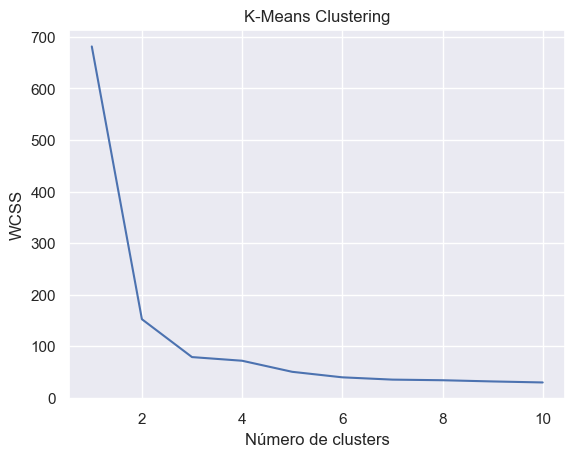

In [5]:
#Graficación del "Codo de Jambu"
sb.set()
plt.plot(range(1,11),wcss)
plt.title("K-Means Clustering")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS") 

Se puede observar que el codo es 3 clusters, número que coincide con las tres variedades de flores que son Setosa, Versicolor y Virginica.

In [7]:
# Calculo de KMeans
kmeans= KMeans(n_clusters=3, init="k-means++",random_state=3)
cluster_values=kmeans.fit_predict(fields)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


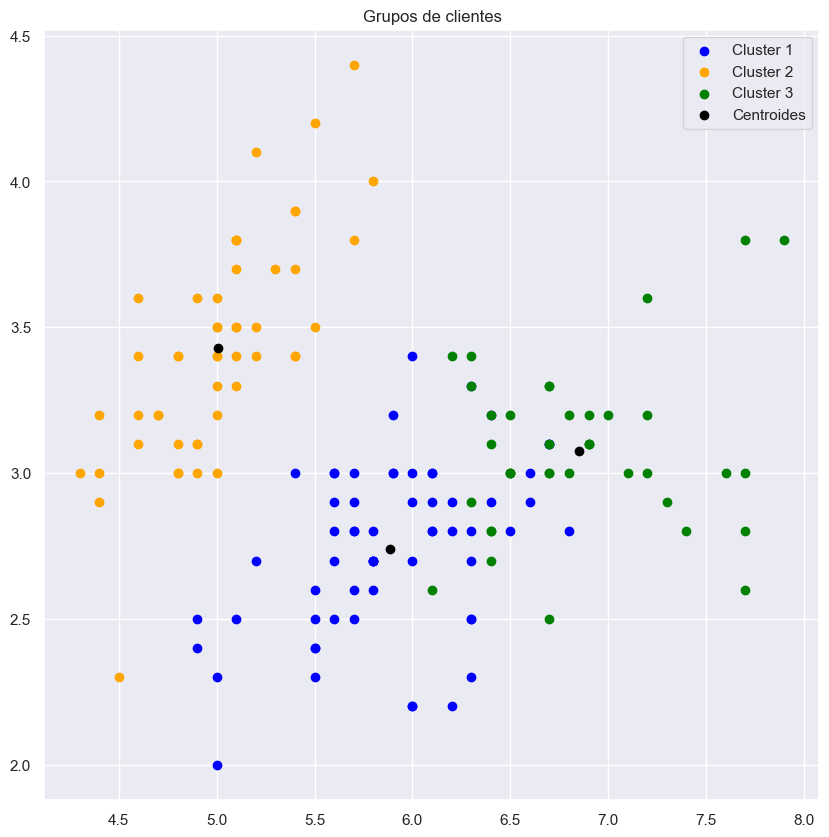

In [8]:
# Visualización de los datos 
plt.figure(figsize=(10,10))
plt.scatter(fields[cluster_values==0,0], fields[cluster_values==0,1], c="blue", label="Cluster 1")
plt.scatter(fields[cluster_values==1,0], fields[cluster_values==1,1], c="orange", label="Cluster 2")
plt.scatter(fields[cluster_values==2,0], fields[cluster_values==2,1], c="green", label="Cluster 3")
# Agregando los centroides
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="black", label="Centroides")
plt.title("Grupos de clientes")
plt.xlabel="Anual income"
plt.ylabel="Spending Score"
plt.legend()

Podemos observar que el cluster 1 y el cluster 3 tienen elementos que se están más cercanos al centroide el otro cluster que del mismo, esto nos podría indicar que los elementos no están bien separados.

In [10]:
#Criterio de la silueta ("Silhouette")
from sklearn import datasets 
from sklearn.metrics import silhouette_score

In [11]:
# Calculo del score de la silueta 
X=dataset.iloc[:,[0,1,2,3]].to_numpy()
for j in range (2,12):
    kmeans=KMeans(n_clusters=j,random_state=42)
    kmeans.fit_predict(X)
    #Calculamos el Score de silueta
    score=silhouette_score(X,kmeans.labels_,metric="euclidean")
    print("Score Silhuoette;", "k= ",j,":", score)

Score Silhuoette; k=  2 : 0.6810461692117465
Score Silhuoette; k=  3 : 0.5511916046195926
Score Silhuoette; k=  4 : 0.4976433179321929
Score Silhuoette; k=  5 : 0.4930804067193527
Score Silhuoette; k=  6 : 0.3678464984712253
Score Silhuoette; k=  7 : 0.35429788771988574
Score Silhuoette; k=  8 : 0.3446797218056204
Score Silhuoette; k=  9 : 0.31558878533897844
Score Silhuoette; k=  10 : 0.30141437453251513
Score Silhuoette; k=  11 : 0.2687356216412034


El criterio de silueta nos indica que el número "ideal" para la clasificación de cluster es 2, posiblemente quiere unficar los cluster 1 y 3, sin embargo, nosotros sabemos que las flores han sido clasificadas por tres grupos. Posiblemente este problema se resuelva mediante reducción por PCA.

# Reducción por PCA (análisis de componentes principales)

In [14]:
# Seleccion de los datos
fields2=dataset.iloc[:,[0,1,2,3]].values
fields2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
# Transformación con PCA
from sklearn import decomposition 
pca=decomposition.PCA(n_components=2)
pca.fit(fields2)
fields2=pca.transform(fields2)
fields2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [16]:
#Se calcula el WCSS (weigthed cluster sum of squares)
wcss2= []
for index in range (1,11):
    kmeans=KMeans(n_clusters=index, init="k-means++", random_state=5)
    kmeans.fit(fields2)
    wcss2.append(kmeans.inertia_)

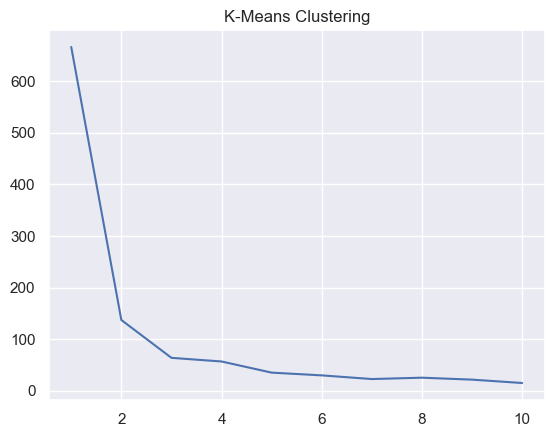

In [17]:
#Graficación del "Codo de Jambu"
sb.set()
plt.plot(range(1,11),wcss2)
plt.title("K-Means Clustering")
plt.xlabel="Número de clusters"
plt.ylabel="WCSS" #Weighted cluster sun of squares

In [18]:
# Calculo de KMeans
kmeans= KMeans(n_clusters=3, init="k-means++",random_state=3)
cluster_values=kmeans.fit_predict(fields2)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


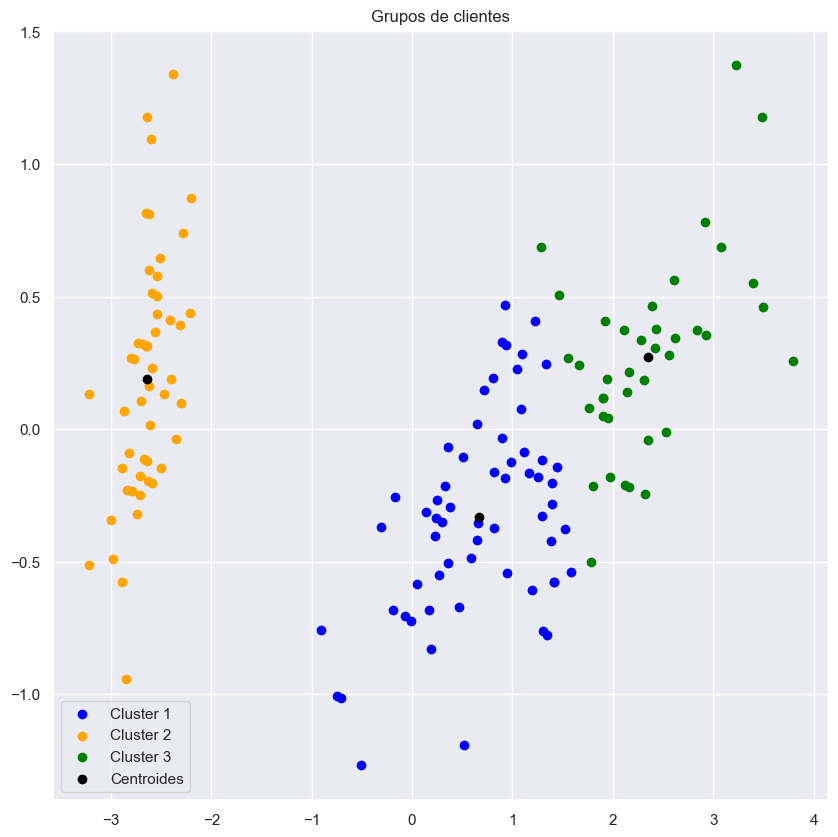

In [19]:
# Visualización de los datos 
plt.figure(figsize=(10,10))
plt.scatter(fields2[cluster_values==0,0], fields2[cluster_values==0,1], c="blue", label="Cluster 1")
plt.scatter(fields2[cluster_values==1,0], fields2[cluster_values==1,1], c="orange", label="Cluster 2")
plt.scatter(fields2[cluster_values==2,0], fields2[cluster_values==2,1], c="green", label="Cluster 3")
# Agergando los centroides
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="black", label="Centroides")
plt.title("Grupos de clientes")
plt.xlabel="Anual income"
plt.ylabel="Spending Score"
plt.legend()

Al observar esta gráfica nos podemos dar cuenta como utilizar el metodo PCA nos dado mejores resultados, pues los elementos del cluster 1 y 3 ya estan completamente separados. 

Sin embargo para que la sepracion de grupos se considere exitosa, en teoria cada grupo deberia pertenecer a una variable definida de la flor.

In [21]:
# Crear un DataFrame con los valores de agropación
dataframe=pd.DataFrame(cluster_values, columns=["grupo"])
dataframe

,grupo
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,0
147,2
148,2


In [22]:
# Unificacion de los datos originales con el grupo asignado por el algoritmo Kmeans 
dataframe2=pd.concat([dataset,dataframe], axis=1, join="inner")
pd.options.display.max_rows=None
dataframe2


,sepal.length,sepal.width,petal.length,petal.width,variety,grupo
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
5,5.4,3.9,1.7,0.4,Setosa,1
6,4.6,3.4,1.4,0.3,Setosa,1
7,5.0,3.4,1.5,0.2,Setosa,1
8,4.4,2.9,1.4,0.2,Setosa,1
9,4.9,3.1,1.5,0.1,Setosa,1


En este caso vemos que el algoritmo no fue efectivo pues la varicaion Virginica y Versicolor esta clasificada en el cluster 1 y 3, siendo Setosa la única clasificada correctamente. En este caso parace ser que el metodo Kmeans no es exitoso para clasificar plantas.